In [4]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def fit(data, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17):
    FZ = data[0]
    SA = data[1]
    IA = data[2]

    C = 1.4
    D = FZ * (a1 * FZ + a2) * (1 - a15 * IA**2)
    
    BCD = a3 * np.sin(np.arctan(FZ / a4) * 2) * (1 - a5 * abs(IA))
    B = BCD / (C * D)
    H = a8 * FZ + a9 + a10 * IA

    E = (a6 * FZ + a7) * (1 - (a16 * IA + a17) * np.sign(SA + H))

    V = a11 * FZ + a12 + (a13 * FZ + a14) * IA * FZ
    Bx1 = B * (SA + H)

    return D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V

# def fit(data, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12):
#     FZ = data[0]
#     SA = data[1]
#     IA = data[2]

#     C = 1.30
#     D = a1 * FZ**2

#     B = (a3 * np.sin(a4 * np.arctan(a5 * FZ))) / (C * D) * (a12 * abs(IA))
#     E = a6 * FZ**2 + a7 * FZ + a8
#     Sh = a9 * IA
#     Sv = (a10 * FZ**2 + a11 * FZ) * IA

#     phi = (1 - E)*(SA + Sh) + (E/B) * np.arctan(B * (SA + Sh))

#     return D * np.sin(C * np.arctan(B * phi)) + Sv

# def fit(data, B, D, E):
#     C = 1.3
#     FZ = data[0]
#     SA = data[1]

#     return FZ * D * np.sin(C * np.arctan(B * SA - E * (B * SA - np.arctan(B * SA))))


In [6]:
tires = {"hoosier_r25b_18x7-5_10x8":{"long":None, "lat":None}}

camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
run_num = 1


In [7]:
for name, tire in tires.items():
    try:
        df = pd.read_csv(f"../tire_data/processed_data/braking_{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity)]
        # print(tire["long"])
        
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../tire_data/processed_data/cornering_{name}.csv")
        tire["lat"] = df[(df["velocity"] == velocity) & (df["pressure"] == pressure)]
        # print(tire["lat"])

    except:
        print("Error getting lateral data for {0}".format(name))

In [8]:
df = tires["hoosier_r25b_18x7-5_10x8"]["lat"]

x_lst = df["FZ"].tolist()
y_lst = df["SA"].tolist()
z_lst = df["IA"].tolist()

w_lst = df["FY"].tolist()

# print(x_lst, y_lst, z_lst)

# a_vals = [8, 1, -4.5]

a_vals = [0, 1100, 1100, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

parameters, covariance = curve_fit(fit, [x_lst, y_lst, z_lst], w_lst, a_vals, maxfev = 10000)

predicted = fit([x_lst[2456], y_lst[2456], z_lst[2456]], *parameters)

print("FZ =", x_lst[2456], "SA =", y_lst[2456], "FY =", w_lst[2456])

print(parameters)
print(predicted)
print(w_lst[2456])



C:\Users\rober\AppData\Local\Temp\ipykernel_1760\1207674232.py:9: RuntimeWarning: divide by zero encountered in true_divide
  BCD = a3 * np.sin(np.arctan(FZ / a4) * 2) * (1 - a5 * abs(IA))


FZ = -872.03 SA = -3.956 FY = 1747.5
[ 1.53351831e-04  3.22747371e+00  8.29812004e+02  1.75824605e+03
  5.34963836e-02 -1.94114866e-04  1.04498959e+00  2.30645718e-04
  4.72661813e-02 -1.64643786e-01  7.55831023e-02  2.11882309e+01
  4.76129494e-05  7.10102754e-02  5.65833920e-03 -3.55888607e-03
 -2.28671858e-02]
1816.7245369140182
1747.5


C:\Users\rober\AppData\Local\Temp\ipykernel_1760\1951459827.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  W = fit(np.array([X, Y, i]), *parameters)
C:\Users\rober\AppData\Local\Temp\ipykernel_1760\1951459827.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


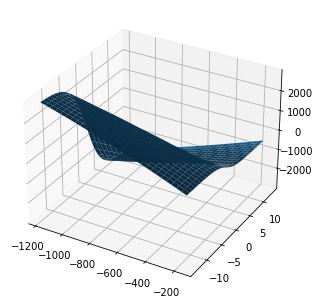

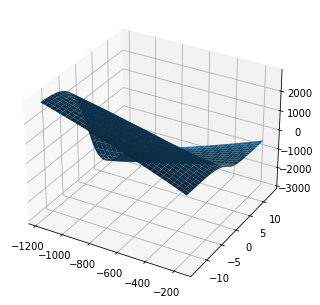

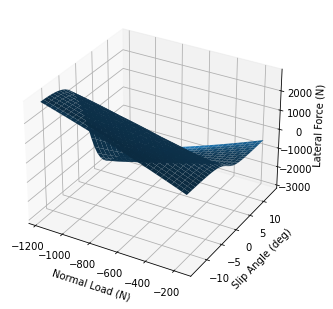

In [19]:
model_x_data = np.linspace(min(x_lst), max(x_lst), 30)
model_y_data = np.linspace(min(y_lst), max(y_lst), 30)
# create coordinate arrays for vectorized evaluations
X, Y = np.meshgrid(model_x_data, model_y_data)
# calculate Z coordinate array

fig = plt.figure()
ax = Axes3D(fig)

for i in range(-2, 1):

    W = fit(np.array([X, Y, i]), *parameters)

    # plot surface
    ax.plot_surface(X, Y, W)
    
# plot input data
# ax.scatter(x_lst, y_lst, w_lst, color='red')
# set plot descriptions
ax.set_xlabel('Normal Load (N)')
ax.set_ylabel('Slip Angle (deg)')
ax.set_zlabel('Lateral Force (N)')

plt.show()

In [10]:
print(parameters)

[ 1.53351831e-04  3.22747371e+00  8.29812004e+02  1.75824605e+03
  5.34963836e-02 -1.94114866e-04  1.04498959e+00  2.30645718e-04
  4.72661813e-02 -1.64643786e-01  7.55831023e-02  2.11882309e+01
  4.76129494e-05  7.10102754e-02  5.65833920e-03 -3.55888607e-03
 -2.28671858e-02]
